---
## Ejercicio 11

Sea X una variable aleatoria cuya distribución de probabilidad es P(X = j) = pj con j =
1,2,.... Sea:

$$
\begin{equation*}
\lambda_n = P(X=n|X>n-1)= \frac{p_n}{1-\sum_{j=1}^{n-1}p_j} \text{, n=1,2,\ldots  }
\end{equation*}
$$
Las cantidades $\lambda_n$, son las tasas discretas de riesgo. Considerando a $X$ como el tiempo (discreto) de vida de algún artículo, $\lambda_n$ representa la probabilidad de que habiendo funcionado correctamente hasta el tiempo $n−1$, se rompa en el tiempo $n$


**a)** Muestre que $p_1=\lambda_1$ y que 
$$
\begin{equation}
p_n = (1-\lambda_1)(1-\lambda_2) \ldots (1-\lambda_{n-1})\lambda_n
\end{equation}
$$
Método de la tasa discreta de riesgo para simular variables aleatorias discretas: Se genera una sucesión de números aleatorios que termina cuando el n-ésimo número generado es menor que $\lambda_n$. El algoritmo puede escribirse como sigue:

*Paso 1: \( X = 1 \)*

*Paso 2: Generar \( U \)*

*Paso 3: Si \( U < \lambda_x \), terminar*

*Paso 4: \( X = X + 1 \)*

*Paso 5: Ir a Paso 2*

### Desarrollo

Para resolver el ejercicio aplico el *Principio de Inducción*. Para $n=1$, notemos que:
$$
p_1 = P(X=1) = P(X=1, X>0) = P(X=1 | X>0) \cdot P(X>0)\\[.5cm]
$$

Como $P(X>0) = 1 \implies p_1 = P(X=1 | X>0) = \lambda_1\\[.5cm]$

Para $n=2$, de manera análoga vemos que

$$
\begin{align*}
p_2 &= P(X=2)\\
    &= P(X=2, X>1)\\
    &= P(X=2|X>1) \cdot P(X>1)\\
    &= \lambda_2 \cdot (1- P(X\leqslant1))\\
    &= \lambda_2 \cdot (1- P(X=1))\\
    &= \lambda_2 \cdot (1-p_1)\\
\end{align*}
$$

Dado que $p_1 = \lambda_1 \implies p_2= \lambda_2 \cdot (1-\lambda_1)\\[.5cm]$ 

Supongamos ahora que $(1)$ se cumple para cierto $n \in \mathbb{N}$

Entonces, para $p_{n+1}$ tenemos que:
$$
\begin{align}
    p_{n+1} &= P(X=n+1) = P(X=n+1 | X > n) \cdot P(X>n) \notag\\
            &= \lambda_{n+1} \cdot (1-\sum_{j=0}^n p_n) \notag\\
            &= \lambda_{n+1} \cdot (1- p_1-p_2-\ldots-p_n) \tag{2}
\end{align}
$$

Ahora por hipótesis inductiva tenemos que:
$$
p_n = (1-\lambda_1)(1-\lambda_2) \ldots (1-\lambda_n-1) \cdot \lambda_n \tag{3}
$$

Pero por definición también es cierto que:
$$
p_n = P(X=n|X>n-1)\cdot P(X>n-1) = \lambda_n \cdot (1-p_1-p_2\ldots-p_{n-1}) \tag{4}
$$

Luego por $(3)\text{ y }(4)$ resulta que:
$$
    (1-\lambda_1)(1-\lambda_2) \ldots (1-\lambda_{n-1})  = (1-p_1-p_2\ldots-p_{n-1}) \tag{5}
$$

Volviendo a $(2)$ tenemos que:
$$
\begin{align}
    p_{n+1} &= (1-p_1-p_2-\ldots-p_n) \cdot \lambda_{n+1} \notag\\
            &= (1-p_1-p_2-\ldots-p_{n-1}) \cdot \lambda_{n+1} - p_n \cdot \lambda_{n+1} \notag\\
            &= (1-\lambda_1)(1-\lambda_2) \ldots (1-\lambda_{n-1}) - p_n \cdot \lambda_{n+1} \tag{5}\\
            &= (1-\lambda_1)(1-\lambda_2) \ldots (1-\lambda_{n-1}) - (1-\lambda_1)(1-\lambda_2) \ldots (1-\lambda_{n-1}) \cdot \lambda_n \cdot \lambda_{n+1} \tag{HI}\\
            &= (1-\lambda_1)(1-\lambda_2) \ldots (1-\lambda_{n-1}) \cdot (1-\lambda_n) \cdot \lambda_{n+1} 
\end{align}
$$

Por lo tanto, para todo $n \geq 1$ se cumple que:
$$
p_n = (1-\lambda_1)(1-\lambda_2) \ldots (1-\lambda_{n-1})\lambda_n
$$





In [10]:
#@title Importaciones
from random import random
import matplotlib.pyplot as plt

In [11]:
#@title algoritmo de tasa de riesgo
def discrete_rateX(p,**kwargs):
    """
    Metodo de la tasa discreta
    """
    k = 1
    sum = 1
    l = 1
    while True:
        u = random()
        if k == 1:
            pass
        else:
            sum -= p(x=k-1,**kwargs)
            # sum -= l*sum
        l = p(x=k,**kwargs)/sum
        if u < l:
            return k
        k += 1

**b)** Muestre que los valores de X que genera este proceso tienen la distribución de probabilidad deseada.

Supongamos que $X$ genera al valor $n$, es decir, que para cada $i < n$ se generó un valor $u_i$ aleatorio en $U(0,1)$ que cumplieron $u_i \geq \lambda_i$ pero el n-ésimo generado cumplió $u_n < \lambda_n$ i.e:

$$
\begin{align*}
P(X = n)&= P(u_1 \geq \lambda_1, u_2 \geq \lambda_2, \ldots, u_{n-1} \geq \lambda_{n-1}, u_n < \lambda_n )\\
        &= \prod_{i=1}^{n-1} P(u_i > \lambda_i) \cdot P(u_n < \lambda_n) \\
        &= \prod_{i=1}^{n-1} (1-\lambda_i) \cdot \lambda_n\\
        &= p_n

\end{align*}
$$

**c)**


Suponga que \( X \) es una variable aleatoria geométrica con parámetro \( p \):

$$
P(X=n) = p (1-p)^{n-1}, \quad n \geq 1.
$$

Determine los valores de $\lambda_n$, $ n \geq 1 $. Explique cómo funciona el algoritmo anterior en este caso y por qué es evidente su validez.

La acumulada es $P(X \leq n) = 1 - (1 - p)^n $, por lo tanto:

$$
P(X > n-1) = 1 - P(X \leq n-1) = 1 - \left(1 - (1 - p)^{n-1}\right) = (1 - p)^{n-1}
$$

Entonces:

$$
\lambda_n = \frac{p(1 - p)^{n - 1}}{(1 - p)^{n - 1}} = p
$$

In [ ]:
def geom_tasa_discreta(p):
    """
    Metodo de la tasa discreta para una variable geometrica
    """
    k = 1
    while True:
        u = random()
        if u < p:
            return k
        k += 1

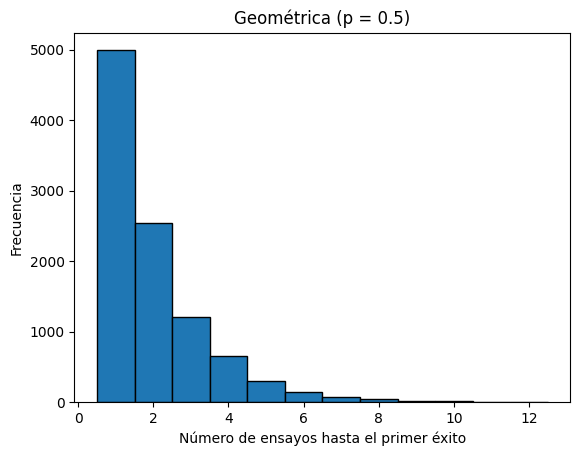

In [14]:
sim = [geom_tasa_discreta(p=0.5) for _ in range(10_000)]

# Graficar el histograma
plt.hist(sim, bins=range(1, max(sim)+2), edgecolor='black', align='left')
plt.title('Geométrica (p = 0.5)')
plt.xlabel('Número de ensayos hasta el primer éxito')
plt.ylabel('Frecuencia')
plt.show()

El algoritmo funciona así:

1. En cada iteración, se genera un número aleatorio $u \sim U(0, 1) $.
2. Se compara con $p$.
   - Si $u < p$, se considera que hubo **éxito** en el intento número $k$, y se retorna ese $k$.
   - Si no, se avanza al siguiente intento.

Esto es lo mismo que repetir ensayos de Bernoulli hasta obtener el primer éxito, lo cual es justamente la definición de una variable geométrica.
